# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [33]:
# Import essential libraries for data manipulation and analysis
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [34]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [35]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df[['created_at', 'actual_delivery_time']].dtypes

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [36]:
# Convert categorical features to category type

categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')
df[categorical_cols].dtypes

Series([], dtype: object)

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [38]:
# Calculate time taken in minutes
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df['time_taken_min'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken_min  
0                      21.0     34.44            47.0  
1                       2.0     27.60            44.0  
2                      18.0     11.56            55.0  
3                       8.0     31.80            59.0  
4                       7.0      8.20            46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [39]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].isin([5, 6]).astype('category')
df[['created_at', 'created_hour', 'created_dayofweek', 'isWeekend']].head()


created_at  created_hour  created_dayofweek isWeekend
0 2015-02-06 22:24:17            22                  4     False
1 2015-02-10 21:49:25            21                  1     False
2 2015-02-16 00:11:35             0                  0     False
3 2015-02-12 03:36:46             3                  3     False
4 2015-01-27 02:12:36             2                  1     False

In [40]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time', 'market_id'], inplace=True)
df.head()

store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_min  \
0                14.0                      21.0     34.44            47.0   
1                 2.0                       2.0     27.60            44.0   
2                 6.0                      18.0     11.56            55.0   
3                 6.0                       8.0     31.80            59.0   
4                 5.0                       7.0      8.20            46.0   

   created_hour  created_dayofweek isWeekend  
0            22                  4     False  
1            21                  1     False  
2             0                  0     False  
3             3                  3     False  
4             2                  1     False

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = df['time_taken_min']

X = df.drop(columns=['time_taken_min'])


In [47]:
# df.head()
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken_min, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [48]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (140621, 14)
X_test shape : (35156, 14)
y_train shape: (140621,)
y_test shape : (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [49]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['isWeekend']
Numerical Columns: ['store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


In [50]:
X['store_primary_category'] = X['store_primary_category'].astype('category')
X['order_protocol'] = X['order_protocol'].astype('category')

categorical_cols = X.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Updated Categorical Columns:", categorical_cols)
print("Updated Numerical Columns:", numerical_cols)

Updated Categorical Columns: ['store_primary_category', 'order_protocol', 'isWeekend']
Updated Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

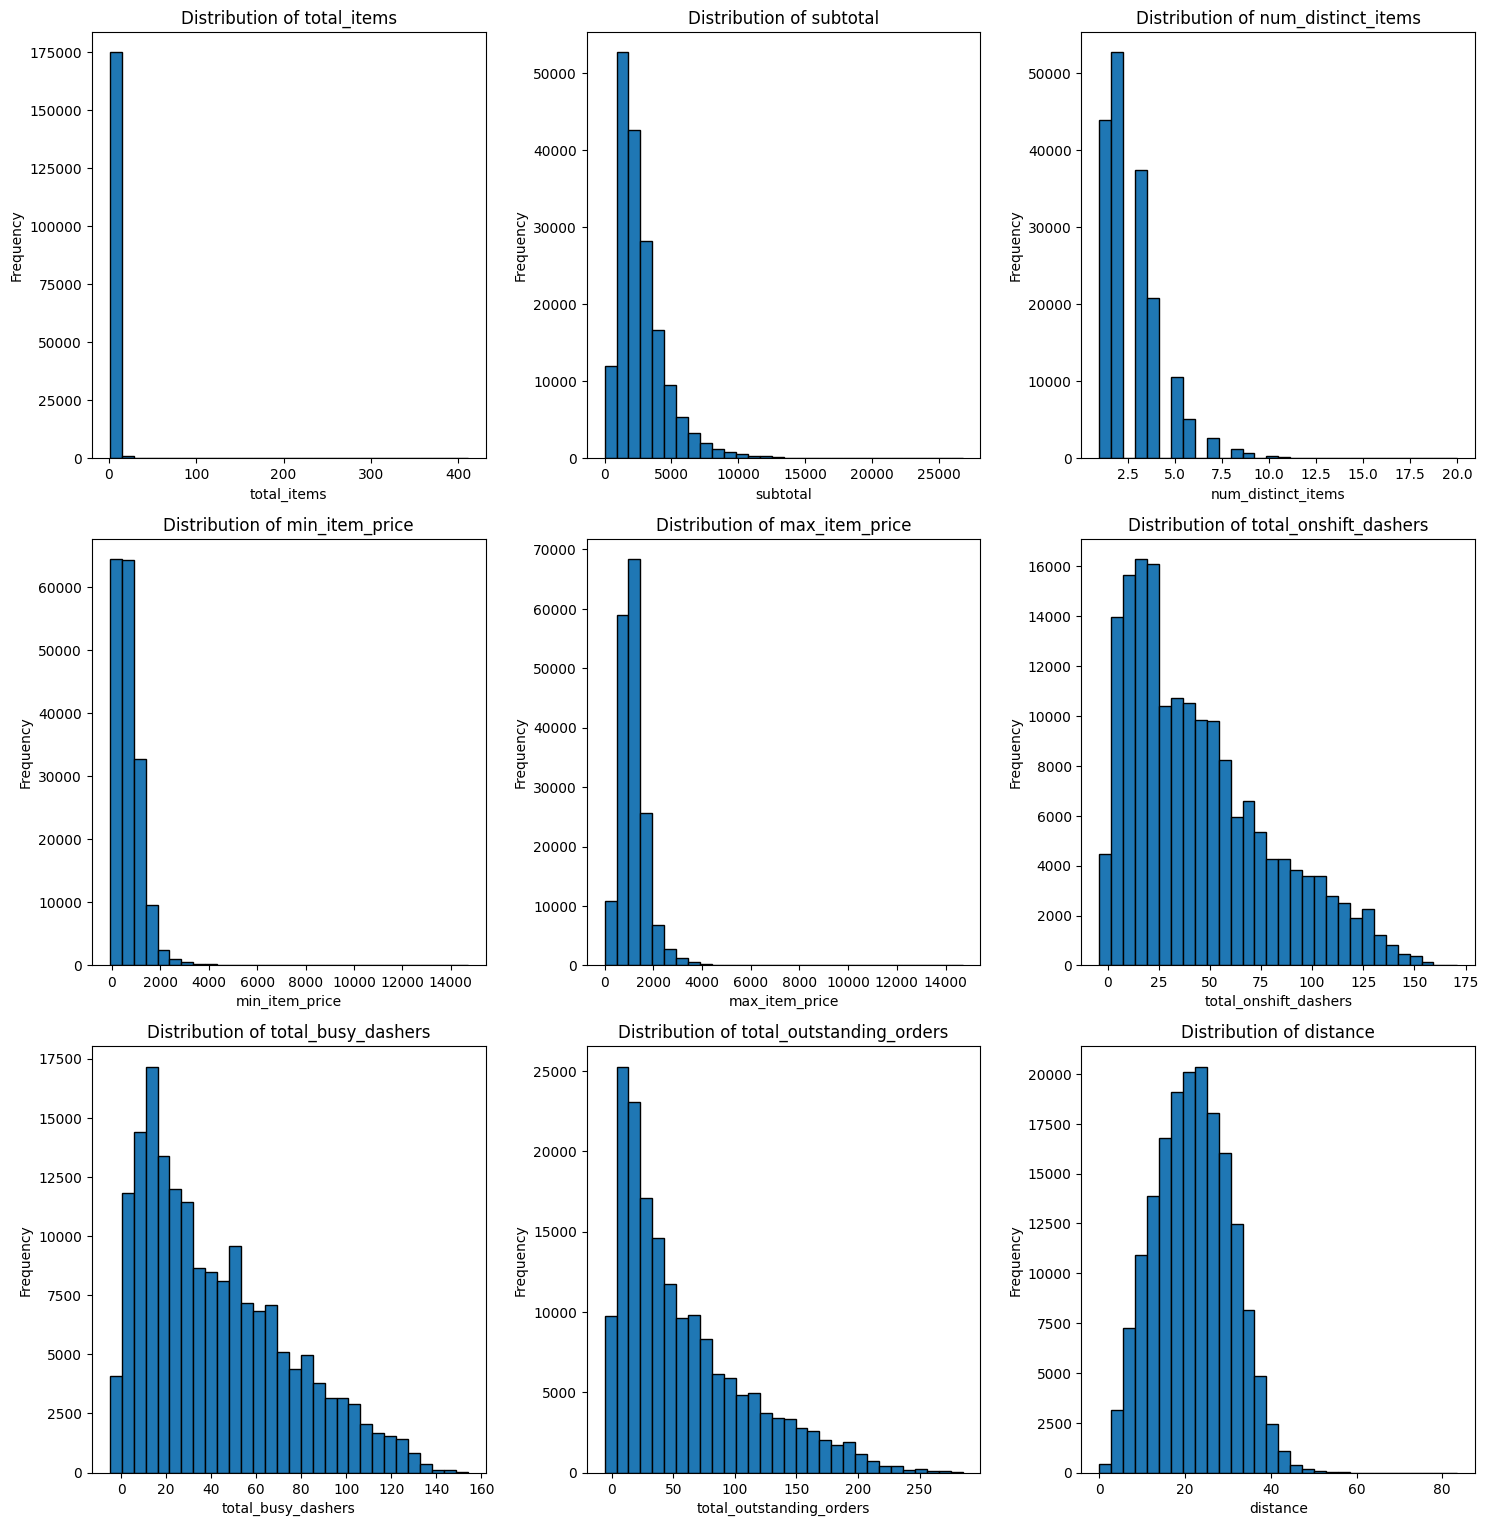

In [51]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    plt.hist(X[col], bins=30, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

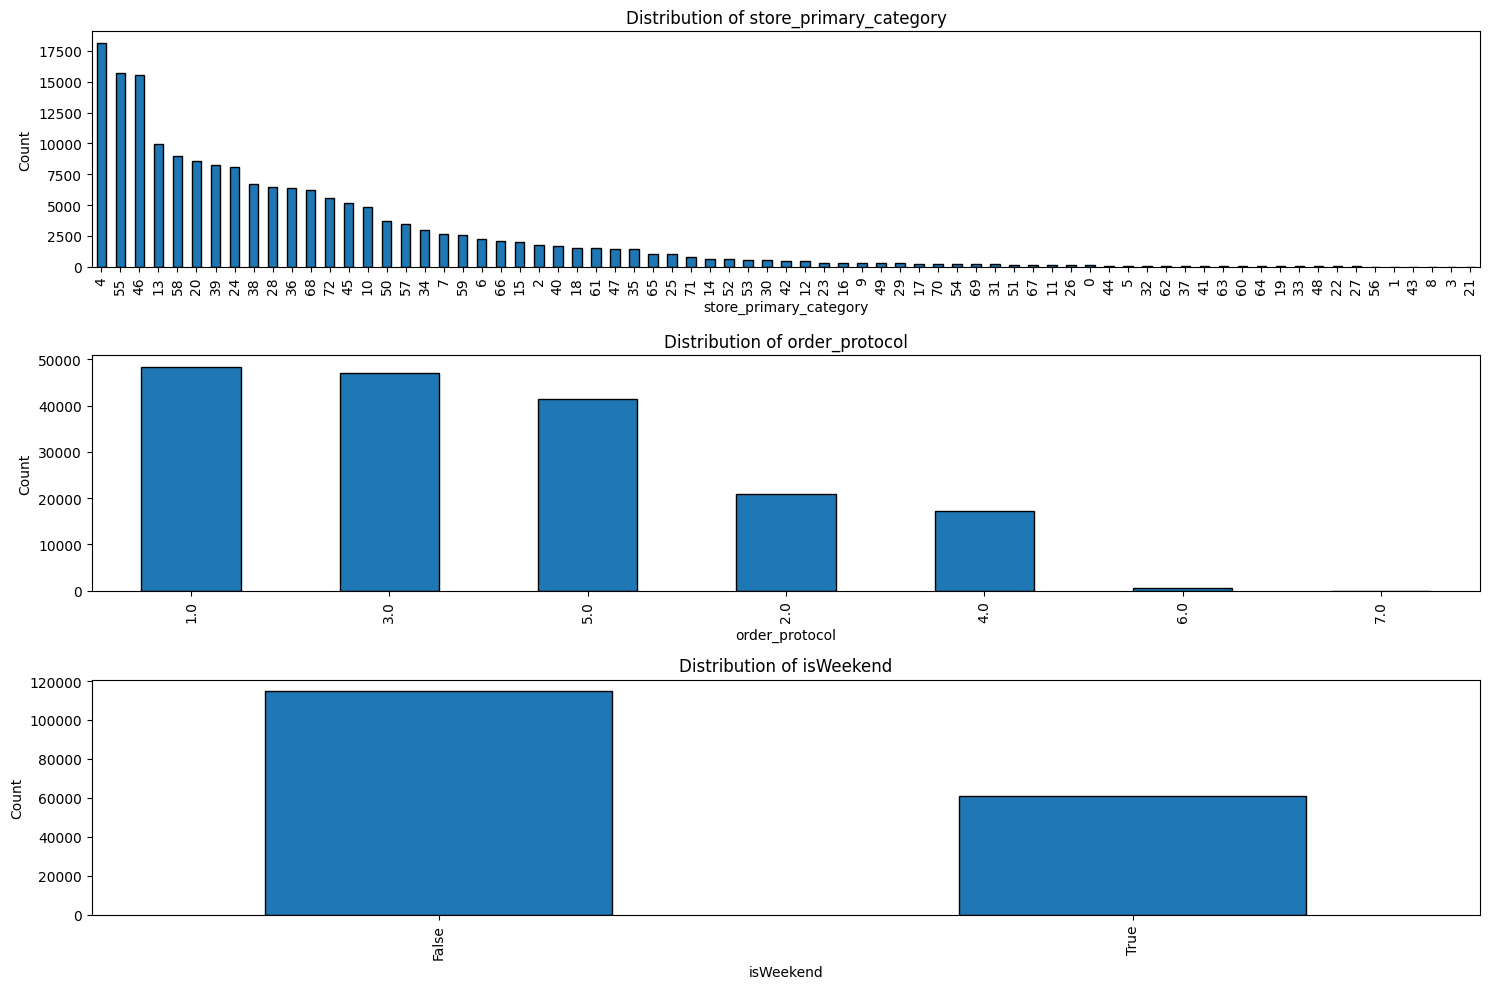

In [52]:
# Distribution of categorical columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    X[col].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

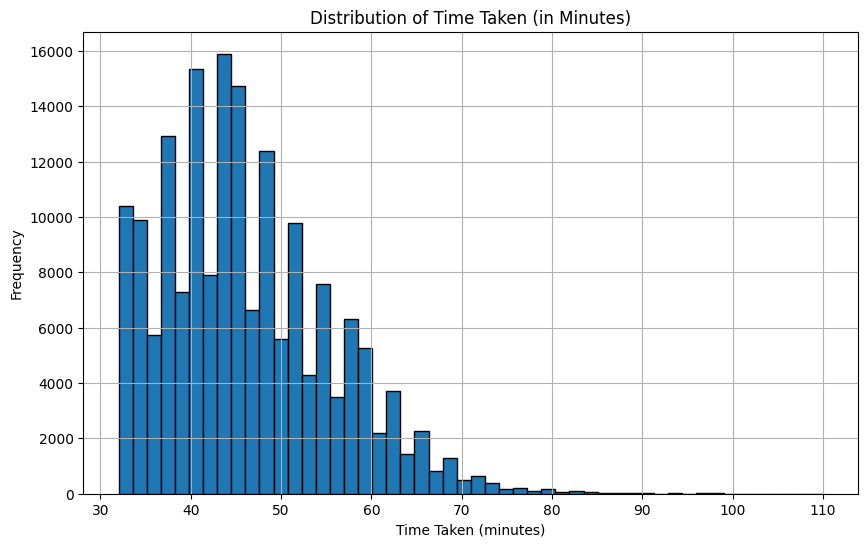

In [53]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, edgecolor='k')
plt.title('Distribution of Time Taken (in Minutes)')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

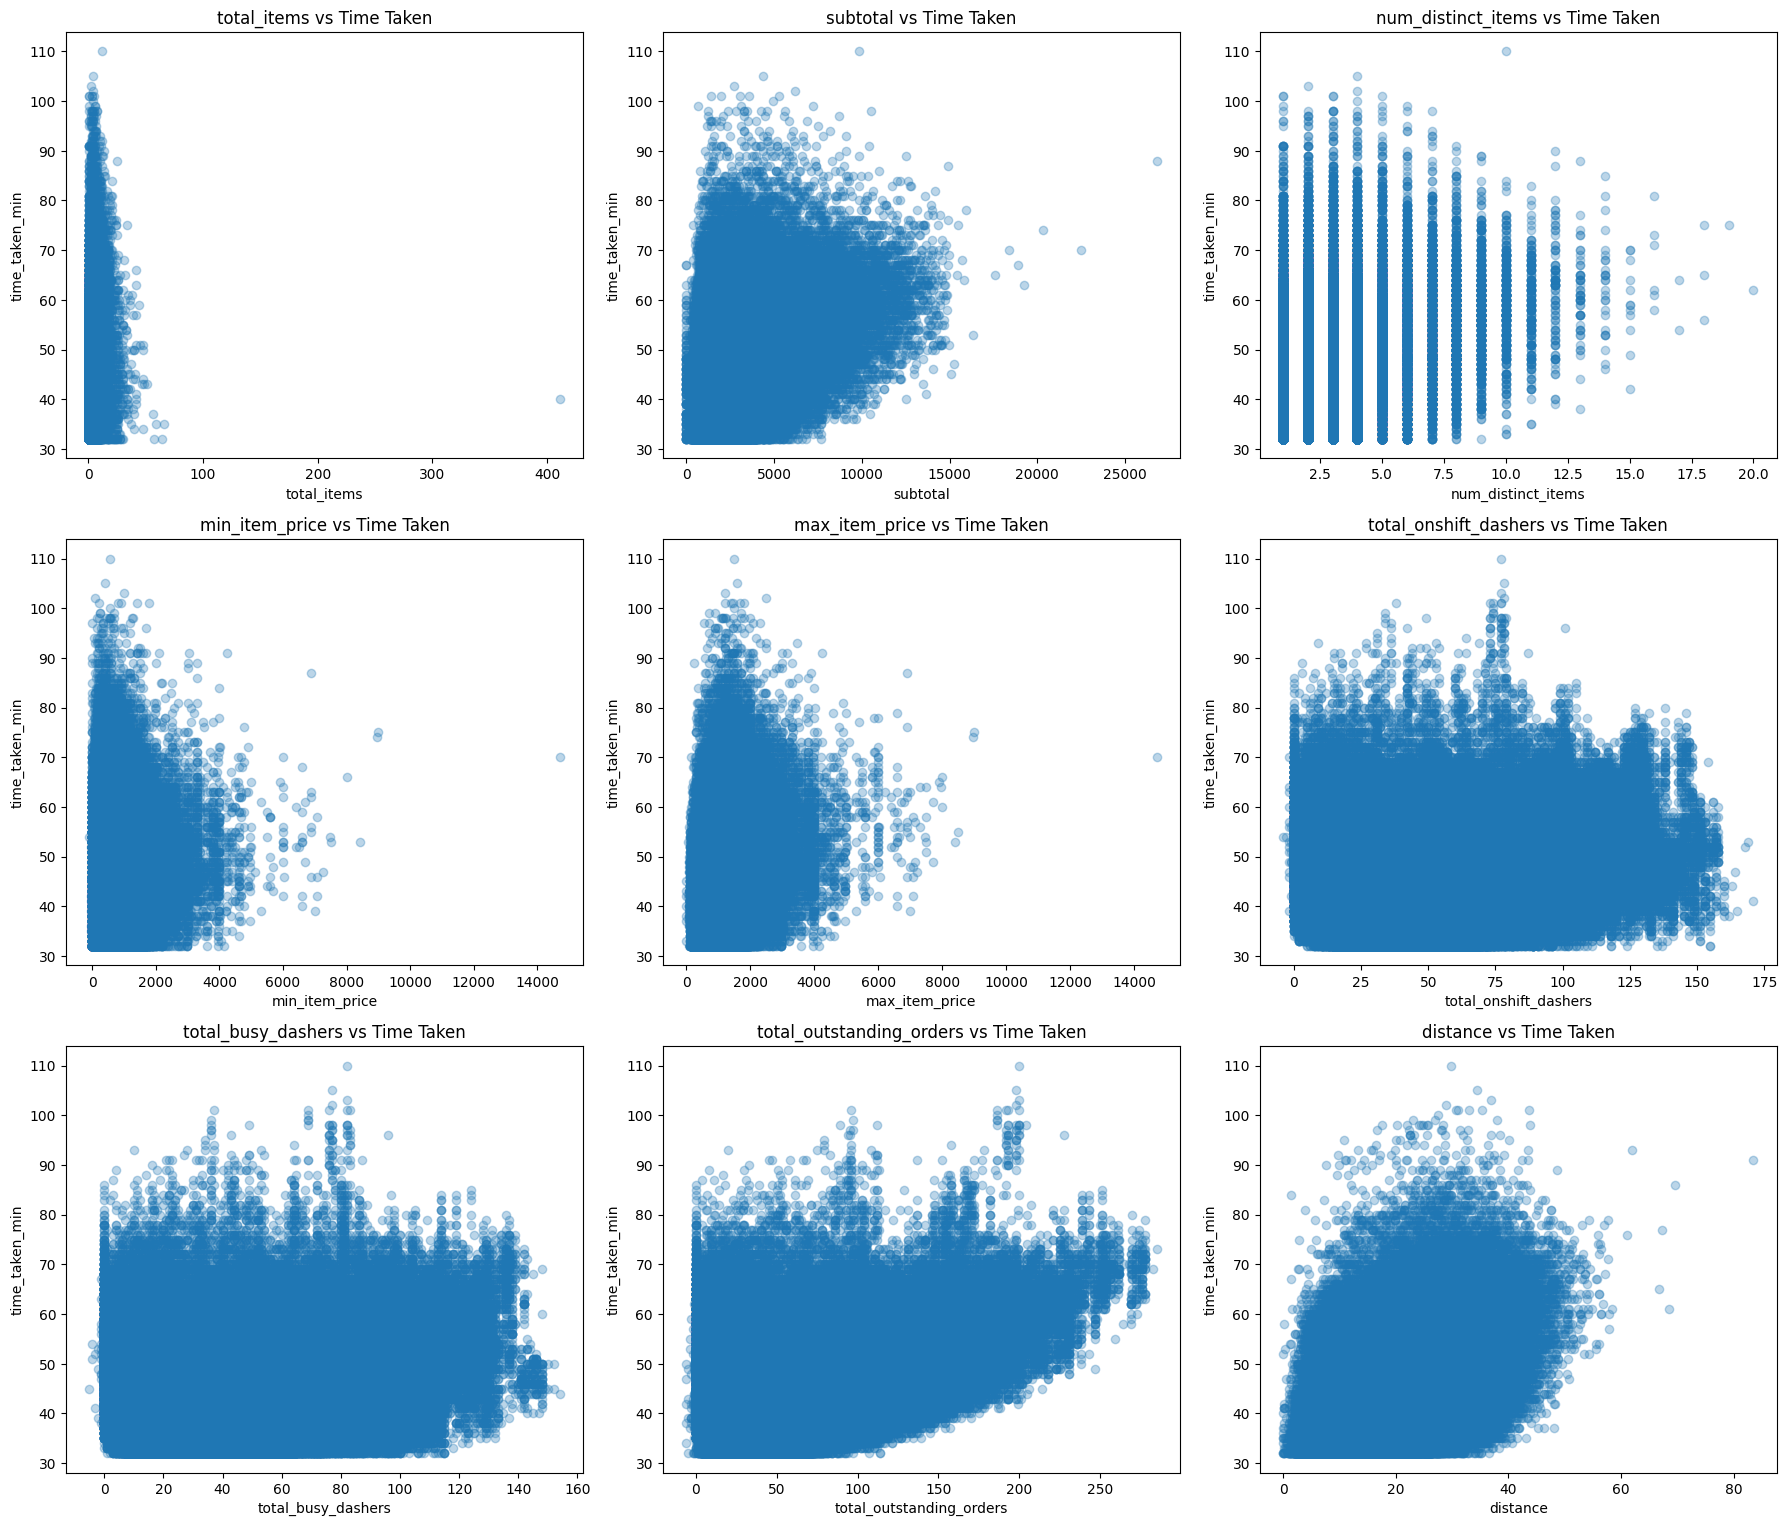

In [54]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(18, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    plt.scatter(X[col], y, alpha=0.3)
    plt.title(f'{col} vs Time Taken')
    plt.xlabel(col)
    plt.ylabel('time_taken_min')

plt.tight_layout()
plt.show()


In [ ]:
# Show the distribution of time_taken for different hours



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [55]:
# Plot the heatmap of the correlation matrix

corr_df = X[numerical_cols].copy()
corr_df['time_taken_min'] = y

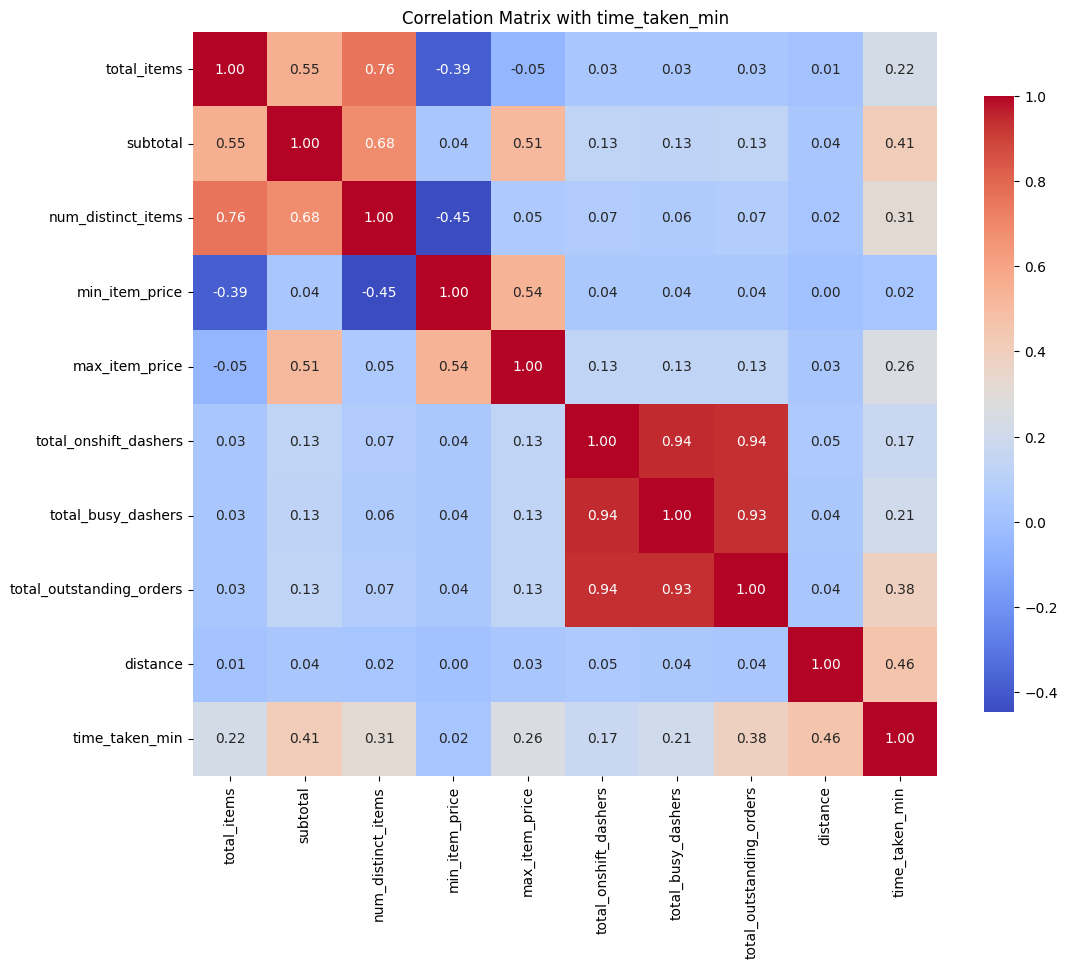

In [56]:
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix with time_taken_min')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [58]:
# Drop 3-5 weakly correlated columns from training dataset

cols_to_drop = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']

X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

print("Updated X_train shape:", X_train.shape)
print("Updated X_test shape :", X_test.shape)

Updated X_train shape: (140621, 11)
Updated X_test shape : (35156, 11)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

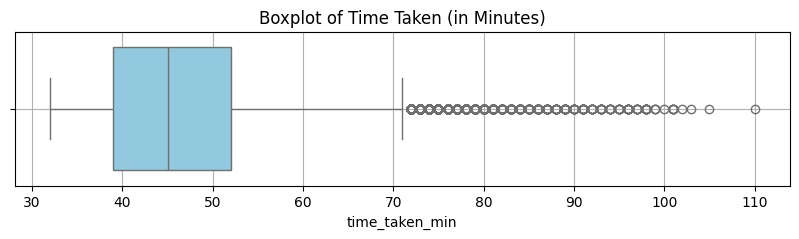

In [59]:
# Boxplot for time_taken

plt.figure(figsize=(10, 2))
sns.boxplot(x=y, color='skyblue')
plt.title('Boxplot of Time Taken (in Minutes)')
plt.xlabel('time_taken_min')
plt.grid(True)
plt.show()

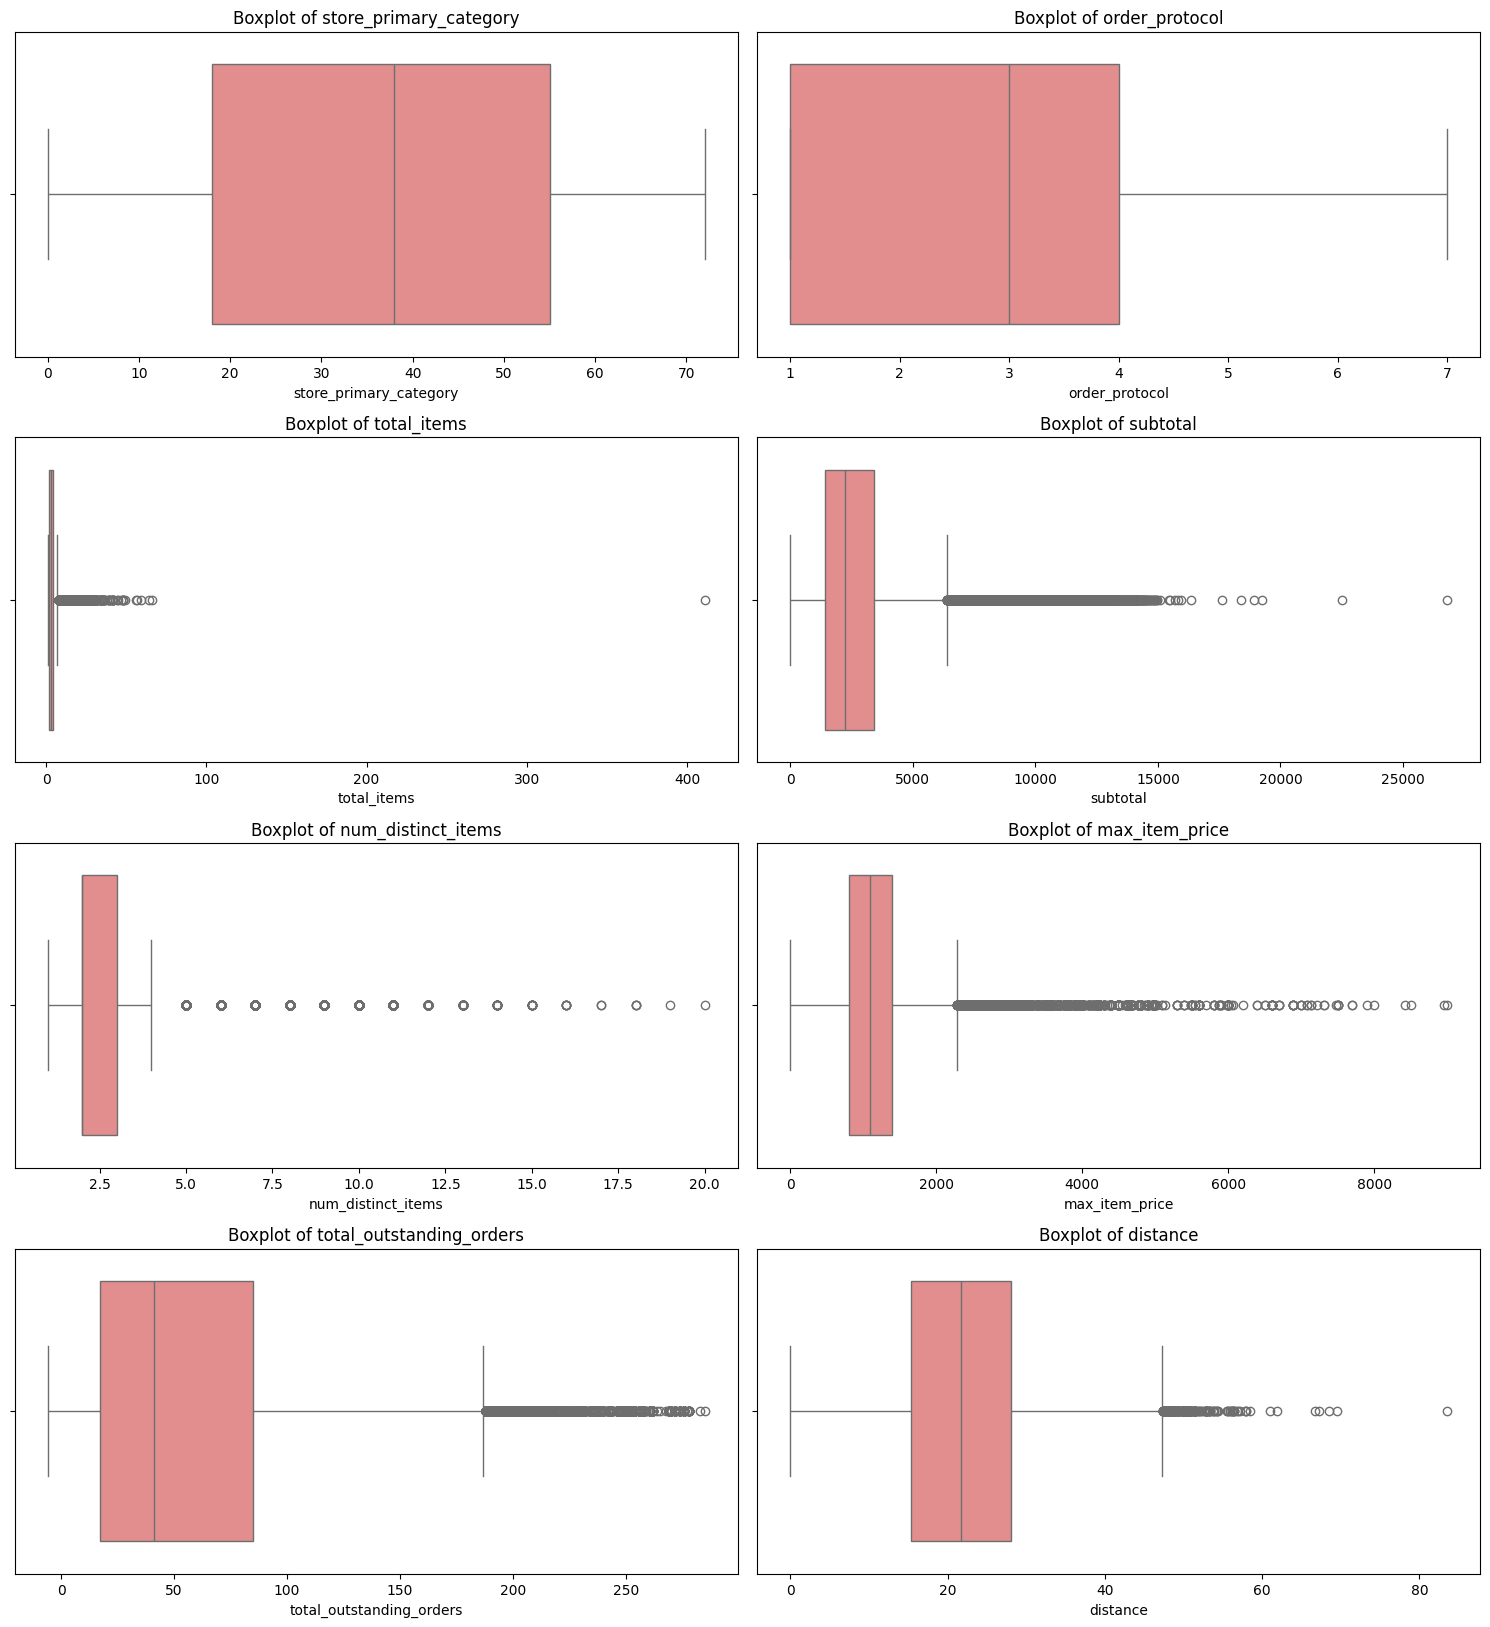

In [60]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(X_train.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(len(numerical_cols) // 2 + 1, 2, i + 1)
    sns.boxplot(x=X_train[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [61]:
# Handle outliers
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)
        
    return df

X_train = cap_outliers_iqr(X_train, X_train.select_dtypes(include=['int64', 'float64']).columns)
X_test = cap_outliers_iqr(X_test, X_test.select_dtypes(include=['int64', 'float64']).columns)

Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
y_train = y_train.clip(lower, upper)
y_test = y_test.clip(lower, upper)


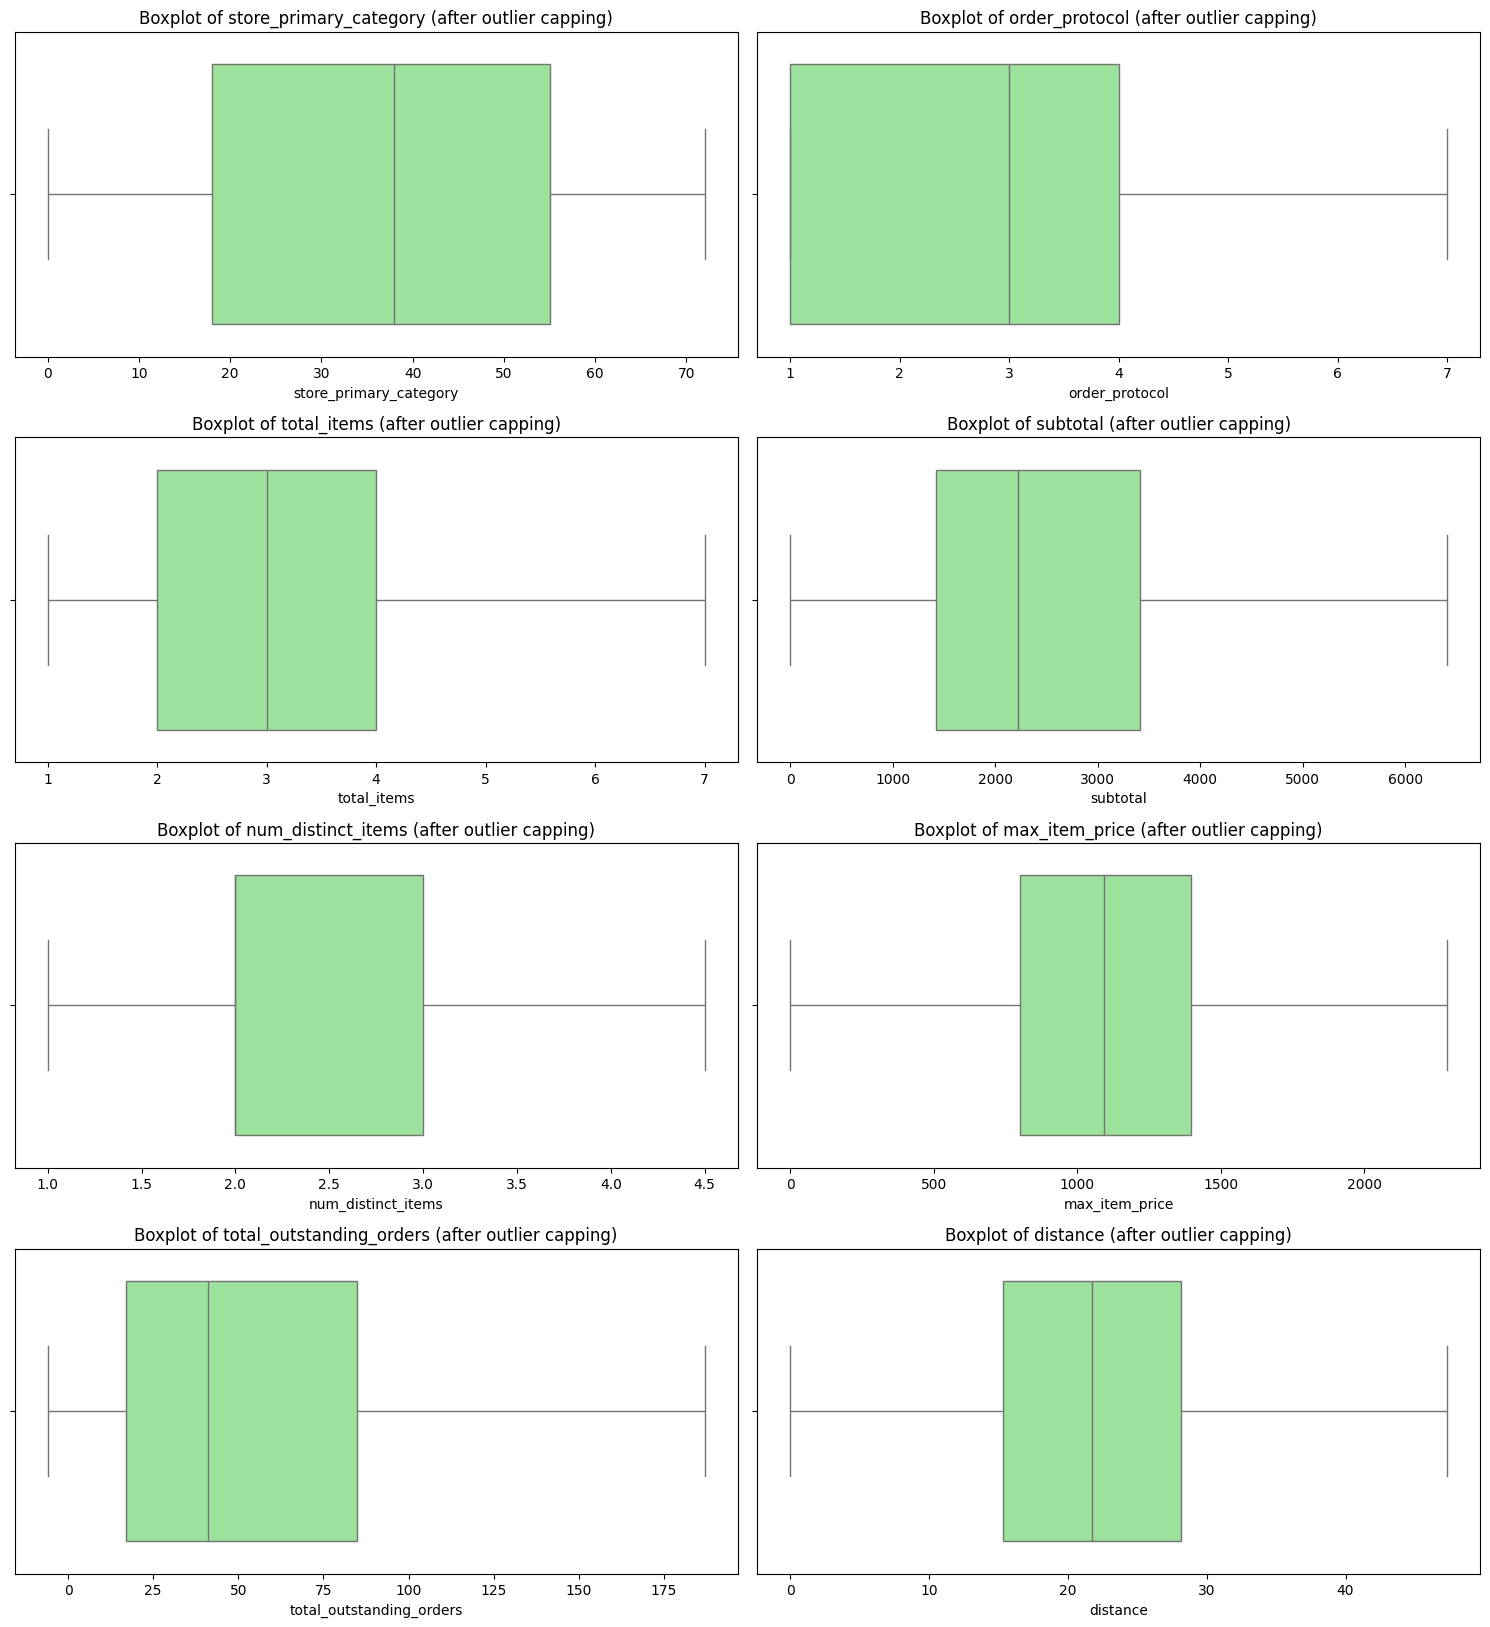

In [62]:
plt.figure(figsize=(15, 20))

numerical_cols_postcap = X_train.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols_postcap):
    plt.subplot(len(numerical_cols_postcap) // 2 + 1, 2, i + 1)
    sns.boxplot(x=X_train[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (after outlier capping)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

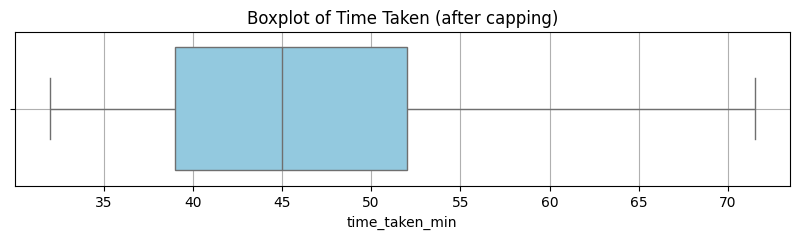

In [63]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=y_train, color='skyblue')
plt.title('Boxplot of Time Taken (after capping)')
plt.xlabel('time_taken_min')
plt.grid(True)
plt.show()


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [64]:
# Define numerical and categorical columns for easy EDA and data manipulation

X_test['store_primary_category'] = X_test['store_primary_category'].astype('category')
X_test['order_protocol'] = X_test['order_protocol'].astype('category')

categorical_cols_test = X_test.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Test Set - Categorical Columns:", categorical_cols_test)
print("Test Set - Numerical Columns:", numerical_cols_test)

Test Set - Categorical Columns: ['store_primary_category', 'order_protocol', 'isWeekend']
Test Set - Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance']


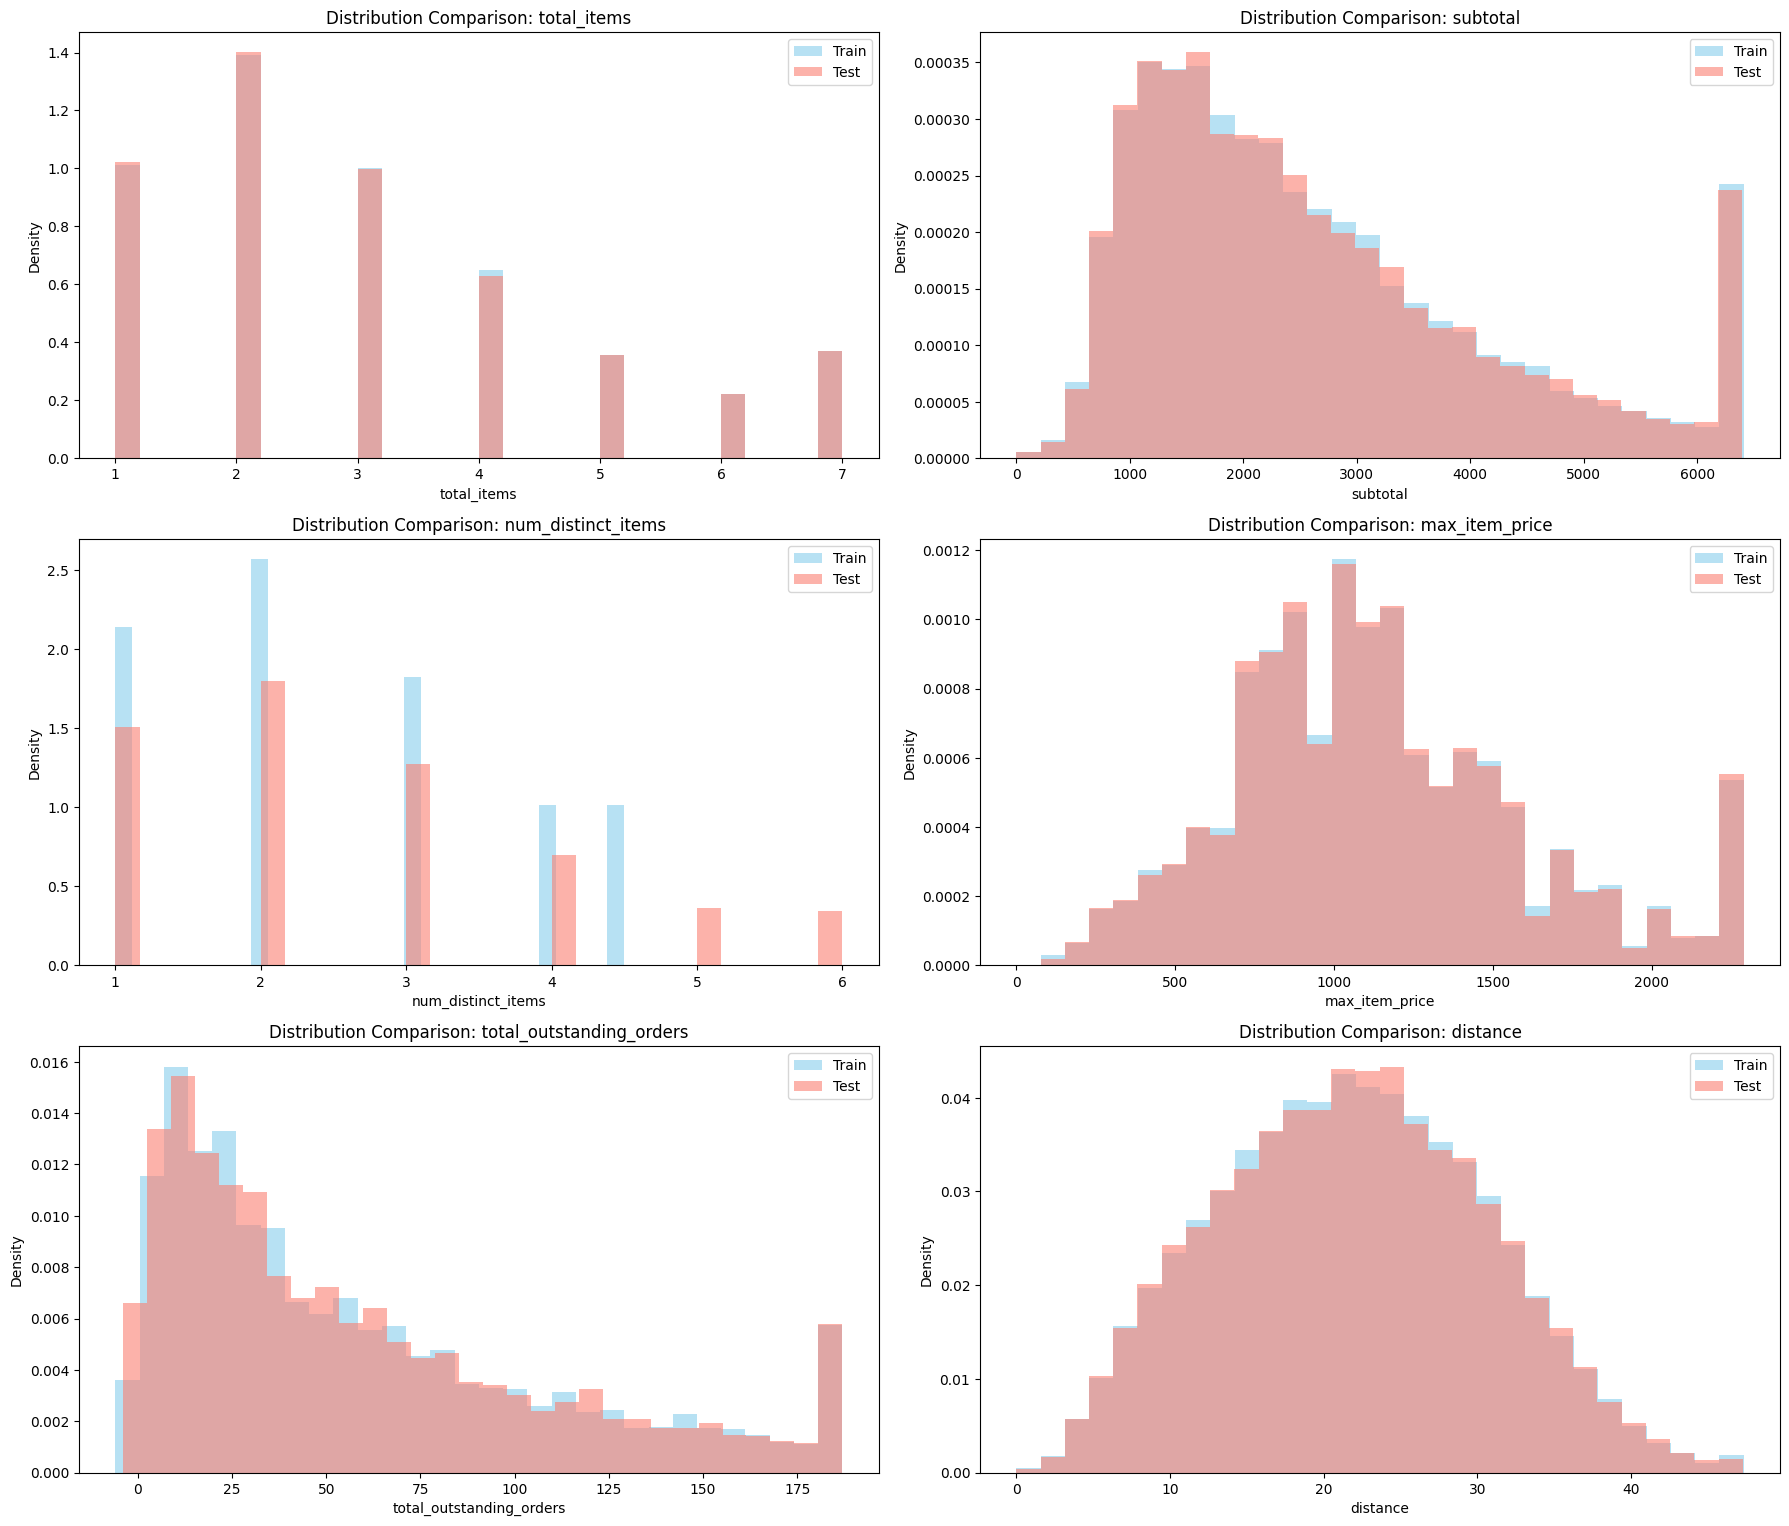

In [65]:
plt.figure(figsize=(18, 20))

for i, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols_test) // 2 + 1, 2, i + 1)
    plt.hist(X_train[col], bins=30, alpha=0.6, label='Train', color='skyblue', density=True)
    plt.hist(X_test[col], bins=30, alpha=0.6, label='Test', color='salmon', density=True)
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

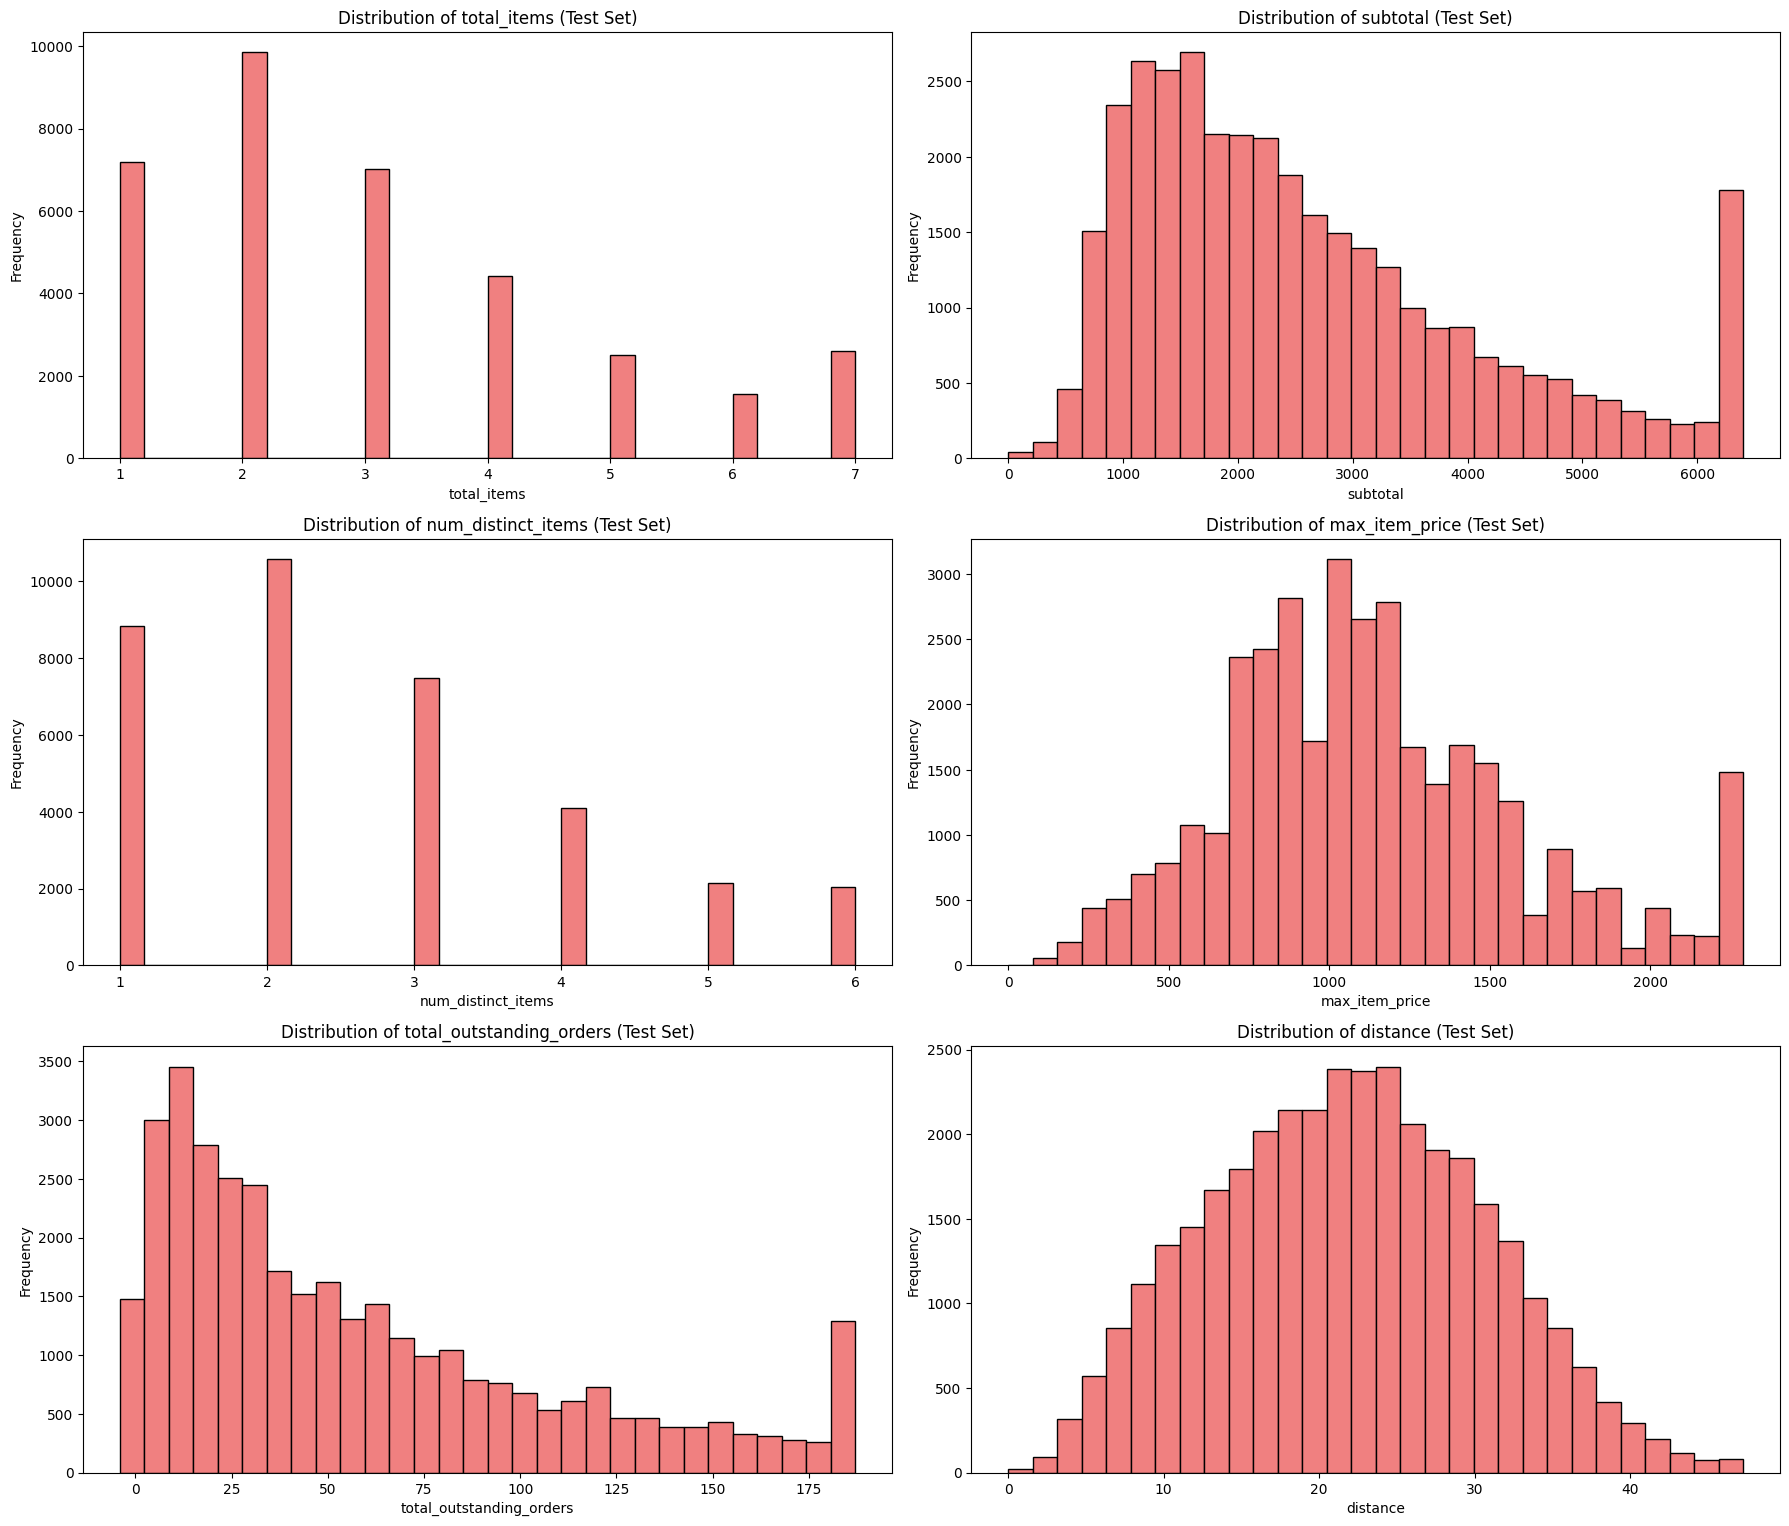

In [66]:
# Plot distributions for all numerical columns

plt.figure(figsize=(18, 20))

for i, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols_test) // 2 + 1, 2, i + 1)
    plt.hist(X_test[col], bins=30, edgecolor='k', color='lightcoral')
    plt.title(f'Distribution of {col} (Test Set)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

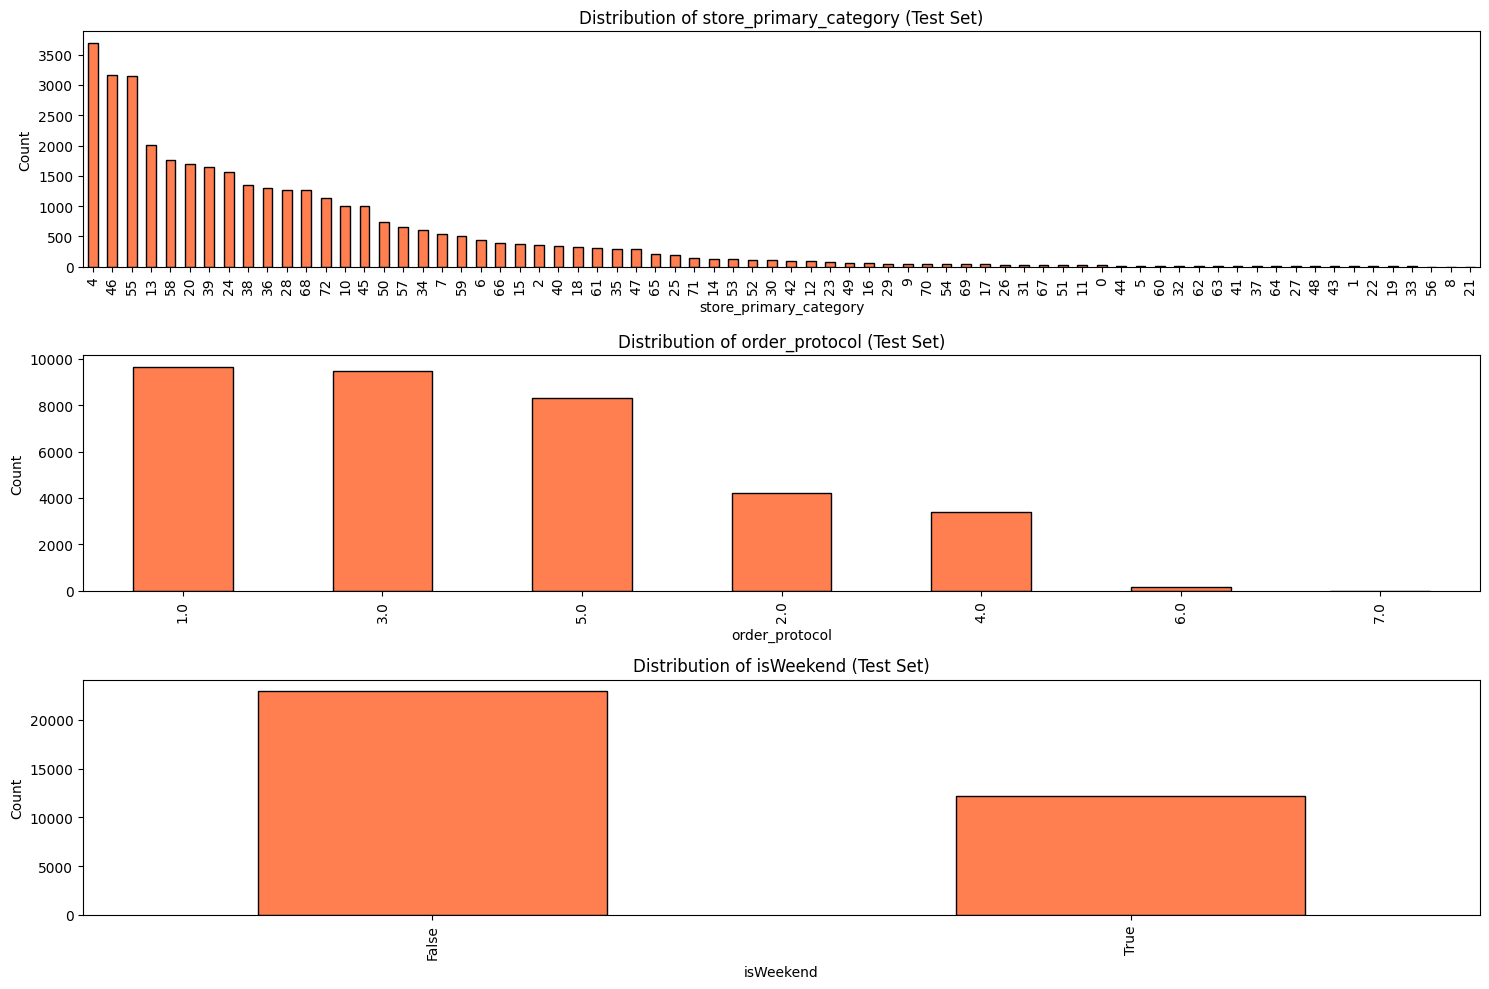

In [67]:
# Distribution of categorical columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols_test):
    plt.subplot(len(categorical_cols_test), 1, i + 1)
    X_test[col].value_counts().plot(kind='bar', edgecolor='k', color='coral')
    plt.title(f'Distribution of {col} (Test Set)')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

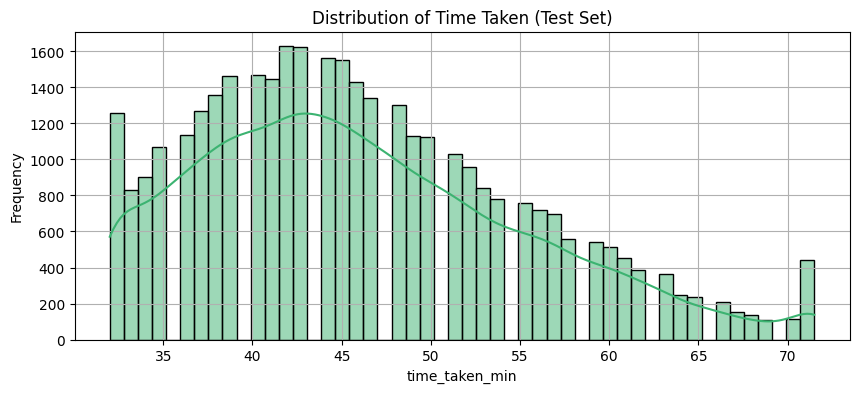

In [68]:
# Distribution of time_taken

plt.figure(figsize=(10, 4))
sns.histplot(y_test, kde=True, bins=50, color='mediumseagreen')
plt.title('Distribution of Time Taken (Test Set)')
plt.xlabel('time_taken_min')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

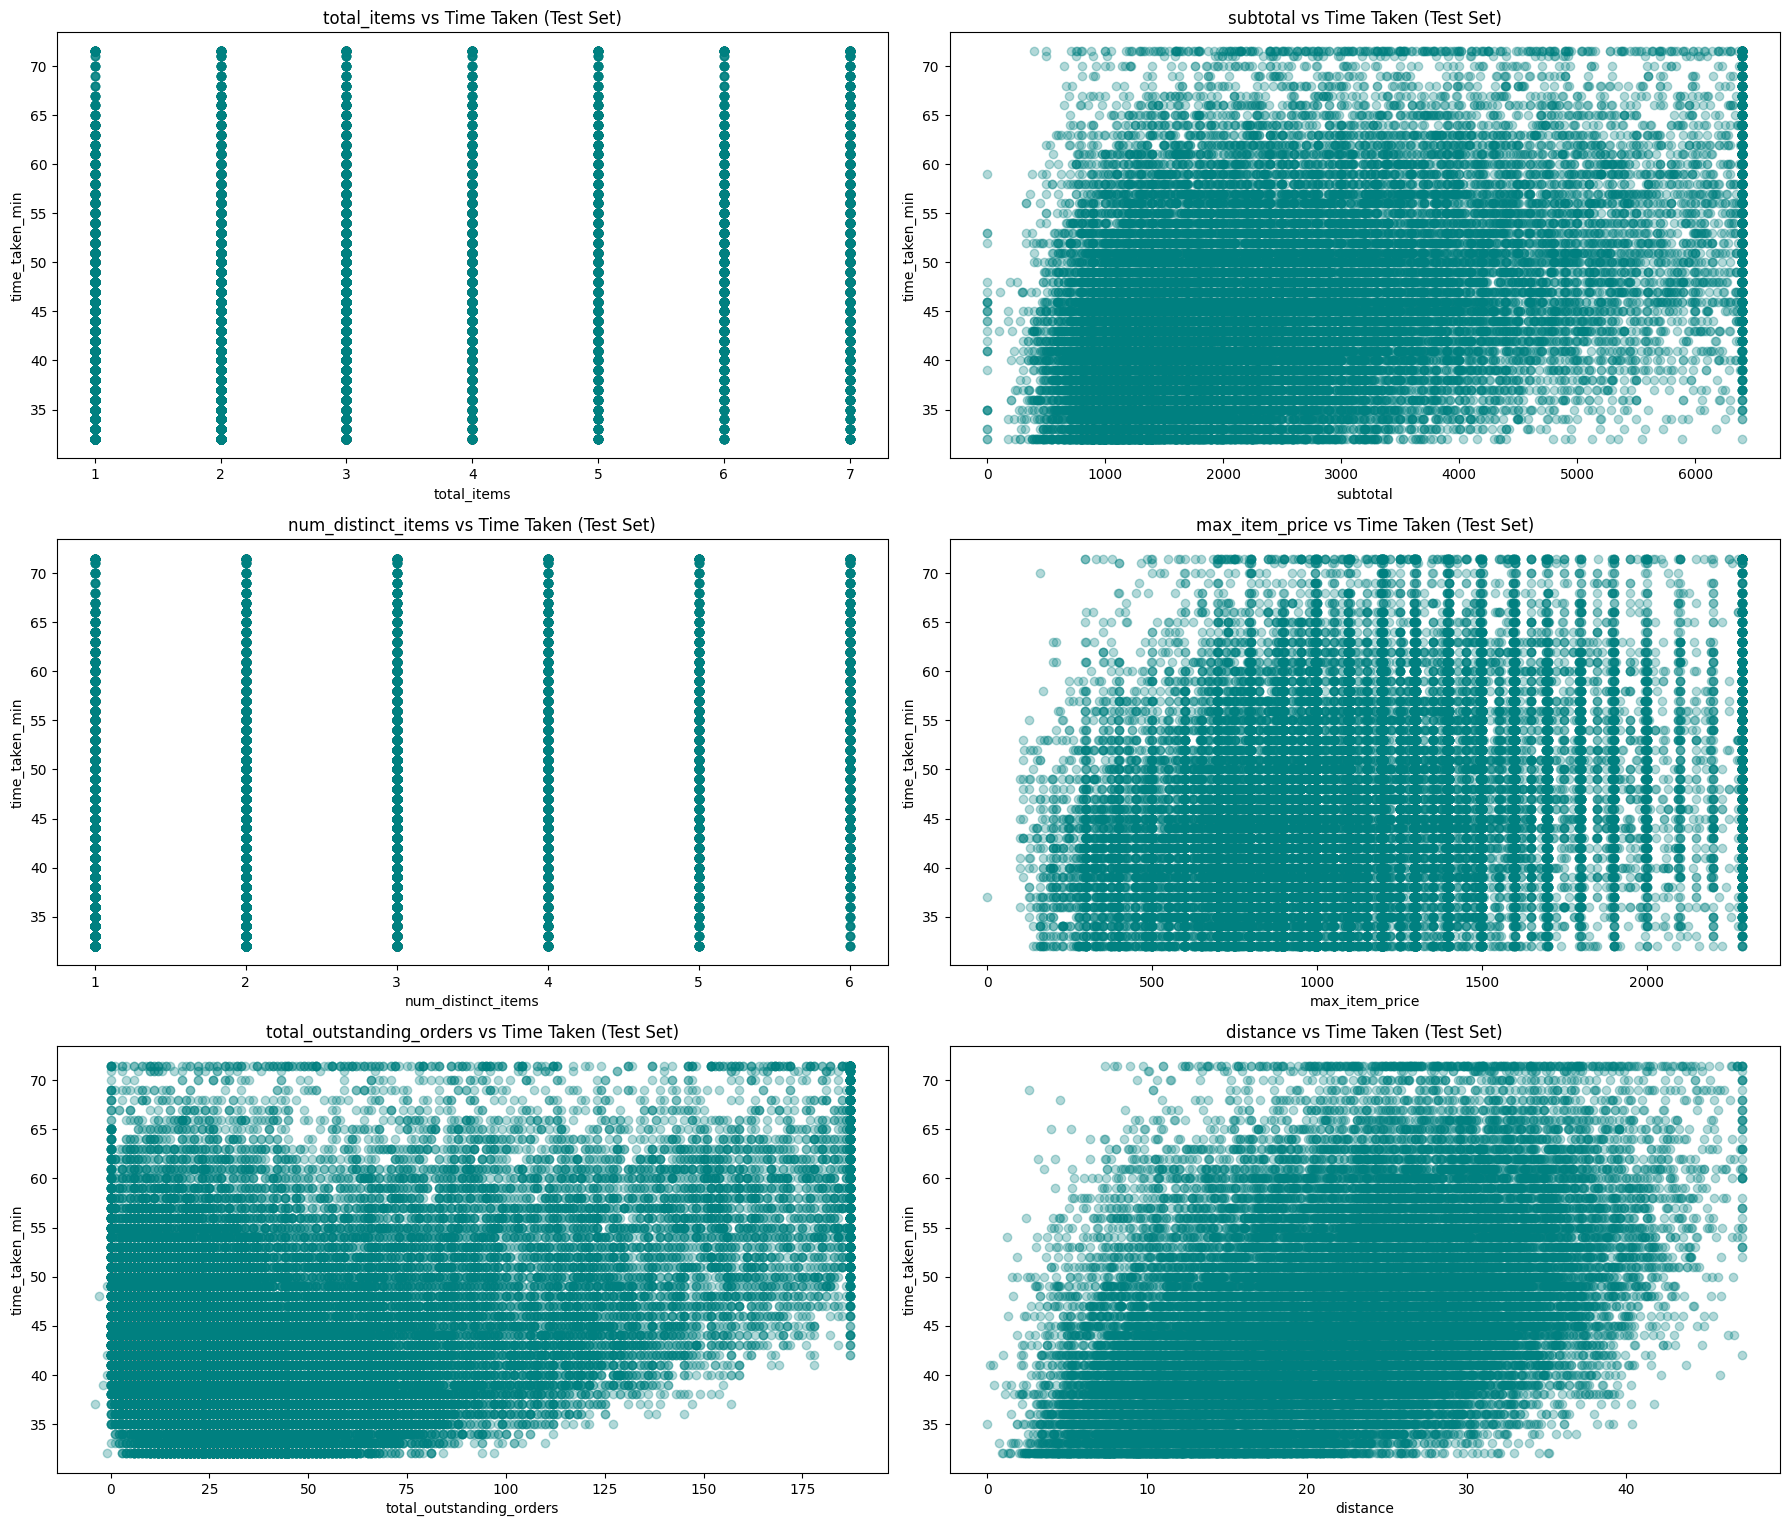

In [69]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(18, 20))

for i, col in enumerate(numerical_cols_test):
    plt.subplot(len(numerical_cols_test) // 2 + 1, 2, i + 1)
    plt.scatter(X_test[col], y_test, alpha=0.3, color='teal')
    plt.title(f'{col} vs Time Taken (Test Set)')
    plt.xlabel(col)
    plt.ylabel('time_taken_min')

plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [70]:
# Drop the weakly correlated columns from training dataset

cols_to_drop_final = ['total_items', 'num_distinct_items', 'max_item_price']

X_train = X_train.drop(columns=cols_to_drop_final)
X_test = X_test.drop(columns=cols_to_drop_final)

print("Updated X_train shape:", X_train.shape)
print("Updated X_test shape :", X_test.shape)

Updated X_train shape: (140621, 8)
Updated X_test shape : (35156, 8)


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [71]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [77]:
# Apply scaling to the numerical columns

numerical_cols = ['subtotal', 'total_outstanding_orders', 'distance']

X_train_numeric = X_train[numerical_cols]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [78]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Initialize the model
lr_model = LinearRegression()


# Add constant for intercept term
X_train_sm = sm.add_constant(X_train_scaled)

# Initialize and fit the model
sm_model = sm.OLS(y_train, X_train_sm)
sm_results = sm_model.fit()

# To view model summary
print(sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:         time_taken_min   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                 4.108e+04
Date:                Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                        12:52:48   Log-Likelihood:            -4.6617e+05
No. Observations:              140621   AIC:                         9.323e+05
Df Residuals:                  140617   BIC:                         9.324e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.1398      0.018   2597.877      0.0

In [80]:
# Train the model using the training data
numerical_cols = ['subtotal', 'total_outstanding_orders', 'distance']
categorical_cols = ['store_primary_category', 'order_protocol', 'isWeekend']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subtotal',
                                                   'total_outstanding_orders',
                                                   'distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['store_primary_category',
                                                   'order_protocol',
                                                   'isWeekend'])])),
                ('regression', LinearRegression())])

In [81]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 40.49
R² Score: 0.5148


In [85]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 5.00
Mean Squared Error (MSE): 40.49
Root Mean Squared Error (RMSE): 6.36
R² Score: 0.5148


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [86]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE

lr = LinearRegression()

# Store results
num_features_list = []
r2_scores = []
mse_scores = []

for n in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=lr, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    lr.fit(X_train_rfe, y_train)

    y_pred = lr.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    num_features_list.append(n)
    r2_scores.append(r2)
    mse_scores.append(mse)

for i in range(len(num_features_list)):
    print(f"Features: {num_features_list[i]} | R²: {r2_scores[i]:.4f} | MSE: {mse_scores[i]:.2f}")

Features: 1 | R²: 0.0198 | MSE: 81.81
Features: 2 | R²: 0.0379 | MSE: 80.29
Features: 3 | R²: 0.0458 | MSE: 79.64
Features: 4 | R²: 0.2583 | MSE: 61.90
Features: 5 | R²: 0.3738 | MSE: 52.26
Features: 6 | R²: 0.4422 | MSE: 46.56
Features: 7 | R²: 0.5338 | MSE: 38.91
Features: 8 | R²: 0.5338 | MSE: 38.91


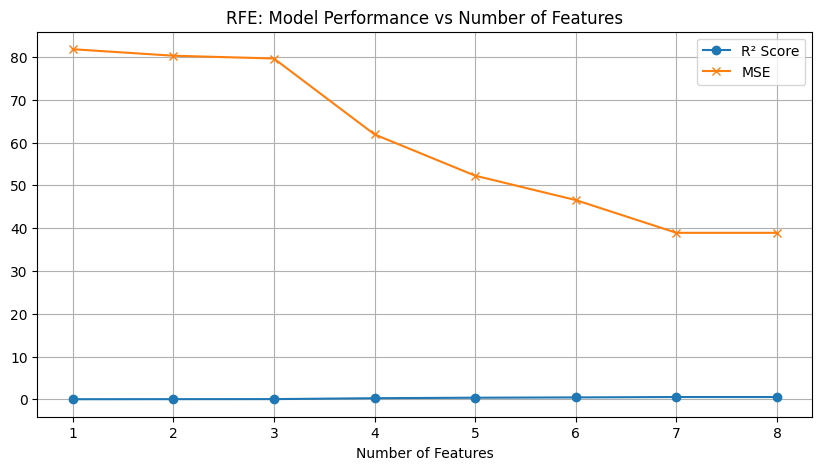

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(num_features_list, r2_scores, marker='o', label='R² Score')
plt.plot(num_features_list, mse_scores, marker='x', label='MSE')
plt.xlabel('Number of Features')
plt.title('RFE: Model Performance vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=7)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_].tolist()
print("Top 7 Selected Features:", selected_features)

Top 7 Selected Features: ['order_protocol', 'subtotal', 'total_outstanding_orders', 'distance', 'created_hour', 'created_dayofweek', 'isWeekend']


In [89]:
# Build the final model with selected number of features

selected_features = ['order_protocol', 'subtotal', 'total_outstanding_orders',
                     'distance', 'created_hour', 'created_dayofweek', 'isWeekend']

X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

In [90]:
numerical_cols_final = ['subtotal', 'total_outstanding_orders', 'distance']
categorical_cols_final = ['order_protocol', 'created_hour', 'created_dayofweek', 'isWeekend']

preprocessor_final = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols_final),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_final)
])

final_model = Pipeline(steps=[
    ('preprocessing', preprocessor_final),
    ('regression', LinearRegression())
])

final_model.fit(X_train_final, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['subtotal',
                                                   'total_outstanding_orders',
                                                   'distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['order_protocol',
                                                   'created_hour',
                                                   'created_dayofweek',
                                                   'isWeekend'])])),
                ('regression', LinearRegression())])

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

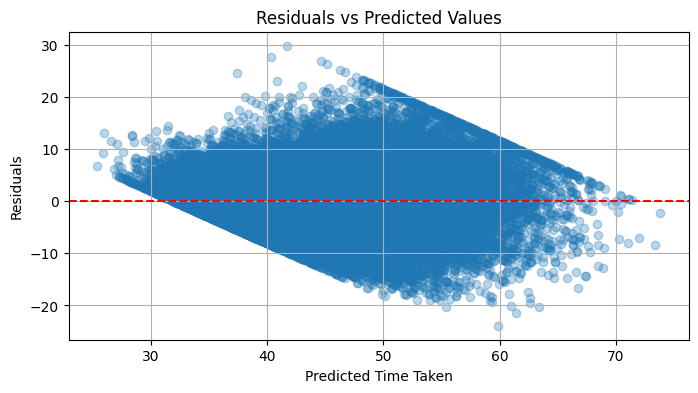

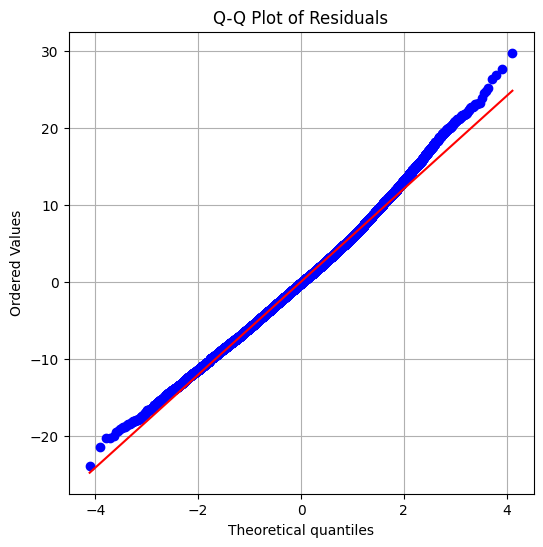

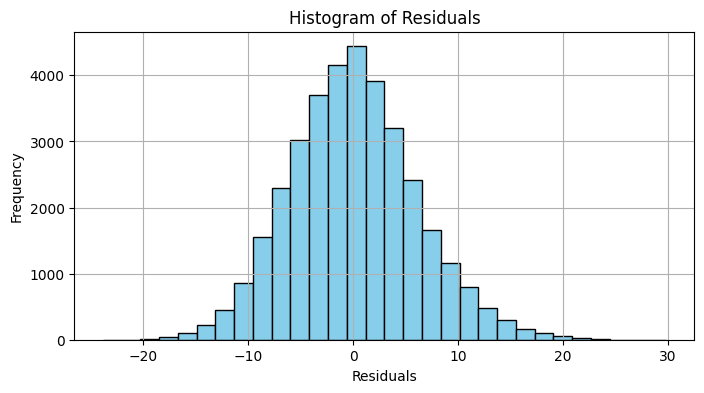

In [92]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

y_pred_final = final_model.predict(X_test_final)
residuals = y_test - y_pred_final

plt.figure(figsize=(8, 4))
plt.scatter(y_pred_final, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Time Taken')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k', color='skyblue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [93]:
# Compare the scaled vs unscaled features used in the final model
import pandas as pd

final_lr = final_model.named_steps['regression']

ohe = final_model.named_steps['preprocessing'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols_final)

all_feature_names = numerical_cols_final + list(cat_feature_names)

scaled_coefs = final_lr.coef_

coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Scaled Coefficient': scaled_coefs
})

In [ ]:
scaler = final_model.named_steps['preprocessing'].named_transformers_['num']
scale_values = scaler.scale_
mean_values = scaler.mean_
unscaled_coefs = scaled_coefs[:len(numerical_cols_final)] * scale_values

coef_df.loc[coef_df['Feature'].isin(numerical_cols_final), 'Unscaled Effect (per unit)'] = unscaled_coefs

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [96]:
final_dataset = X_train[selected_features].copy()
final_dataset['time_taken_min'] = y_train

final_dataset.to_csv("final_training_data.csv", index=False)

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

df = pd.read_csv("final_training_data.csv")
X = df.drop(columns=['time_taken_min'])
y = df['time_taken_min']

numerical_cols = ['subtotal', 'total_outstanding_orders', 'distance']
categorical_cols = ['order_protocol', 'created_hour', 'created_dayofweek', 'isWeekend']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])

pipeline.fit(X, y)
scaler = pipeline.named_steps['preprocessing'].named_transformers_['num']
model = pipeline.named_steps['regression']

feature = 'distance'
idx = numerical_cols.index(feature)

std_dev = scaler.scale_[idx]
coef_scaled = model.coef_[idx]
coef_unscaled = coef_scaled / std_dev

print(f"A 1 unit increase in '{feature}' increases delivery time by approximately {coef_unscaled:.4f} minutes.")

A 1 unit increase in 'distance' increases delivery time by approximately 0.4599 minutes.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes there are categorical variables in the dataset such as order_protocol, created_hour, created_dayofweek, and isWeekend. These variables represent types of orders, the time and day the order was placed, and whether it was a weekend.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means 20% data will be used for testing and remaining 80% will be used for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The target variable was 'time_taken_min' looking at the heat map the 'distance' feature that has the highest correlation with the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used boxplots for each numerical feature. In these plots, outliers appear as points that fall far outside the normal range of the data. To handle them, I used a simple method called IQR capping.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on the final model the top 3 features significantly affecting the delivery time were: distance ,total_outstanding_orders ,subtotal 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is a simple and widely used algorithm that helps us understand the relationship between one or more input featureslike distance or order value and a target value like delivery time. It works by drawing a straight line that best fits the data points, so we can predict the target based on new inputs. The goal is to find the line or equation that minimizes the difference between the actual values and the predicted values. It is like finding the best line through a scatter plot that shows the overall trend.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression uses only one input feature to predict the target, while multiple linear regression uses two or more features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how far off the models predictions are from the actual values it tells us how bad the model is doing.
The most common cost function is Mean Squared Error (MSE), which calculates the average of the squared differences between predicted and actual values.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting happens when a model learns the training data too well, including the noise and random patterns, it performs well on training data but poorly on new data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>The residuals are randomly spread which is good it means the model fits well Or if there’s a pattern which is bad it suggests problems like non-linearity or missing features